## THIS PROGRAM PREDICTS IF A PASSENGER WILL SURVIVE ON THE TITANIC

In this dataset 0 means that they didn't survive and 1 means they survived

1. Survived- They are in 1 and 0. 1 means they didn't survive, while 0 means they survived
2. Pclass - Means the passengers class of seat. 1 is for First Class, 2 is for Second Class and 3 is for Third Class
3. Sex - Male and Female
4. SibSp - If you are on the ship with a Siblings or Spouse that is on board with you. 0 means, didnt survive 1 means survived
5. Parch - If you are on the ship with a Parent or children. 0 means did not survive 1 means survived
6. Embarked - S - Southampton, Q - Queenstown, C - Cherbourg. Where you emabarked from

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
#Load the data
titanic = pd.read_csv('train.csv')

In [57]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
titantic.shape

(891, 12)

In [59]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [60]:
#Get a count of the number of survivors
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### 549 people did not survive which is indicated by the value zero and 342 survived

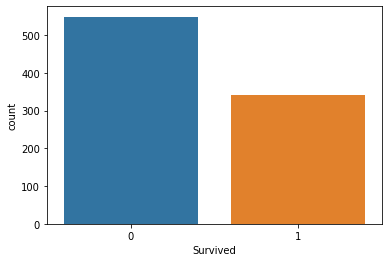

In [61]:
#Visualize the count of survivors
sns.countplot( titanic['Survived'])

Visualize the count of survivors for columns 'sex', 'Pclass', 'sibsp', 'parch', 'embarked'

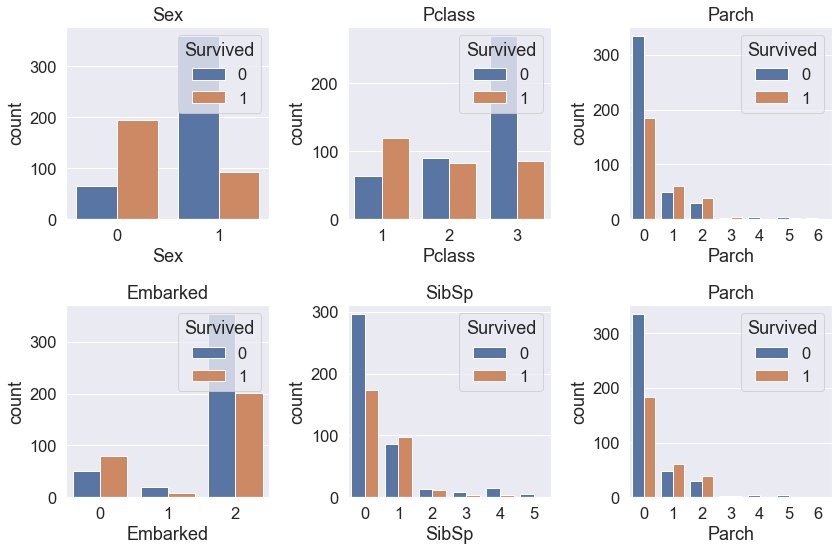

In [128]:
cols = [ 'Sex', 'Pclass', 'Parch', 'Embarked', 'SibSp', 'Parch']

n_rows = 2
n_cols = 3

#The subplot grid and figure size of each graph
fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols * 4.0, n_rows * 4.0))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        
        i = r*n_cols + c #Index to go through the name of columns
        ax = axs[r][c] #shpw where to position each sub plot
        sns.countplot(titanic[cols[i]], hue= titanic['Survived'], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title = 'Survived', loc = 'upper right')
        
plt.tight_layout()

In [132]:
titanic.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
0,0.752896
1,0.205298


In [64]:
# Look at survival rate by sex and class
titanic.pivot_table('Survived', index = 'Sex', columns ='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


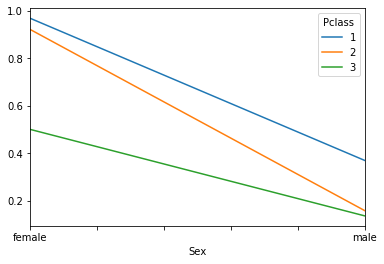

In [65]:
# Look at survival rate by sex and class
titanic.pivot_table('Survived', index = 'Sex', columns ='Pclass').plot()

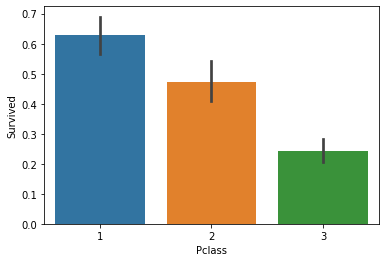

In [66]:
# Plot the survival rate of each class
sns.barplot(x='Pclass', y='Survived', data=titanic)

In [67]:
# Survival rate by sex, age and class
age = pd.cut(titanic['Age'], [0, 18, 80])
titanic.pivot_table('Survived', ['Sex', age], 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

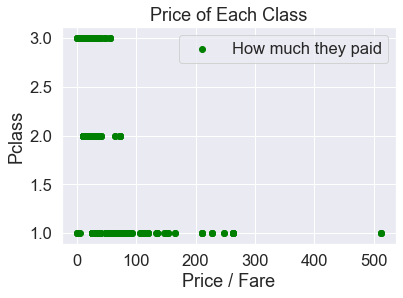

In [122]:
# Plot the prices paid of each class
plt.scatter(titanic['Fare'], titanic['Pclass'] , color ='green', label='How much they paid')
plt.ylabel('Pclass')
plt.xlabel('Price / Fare')
plt.title('Price of Each Class')
plt.legend()
plt.show()

### All the graphs and Data manipulations have shown that women survived at a very large rate

In [114]:
# Count the empty values in each column
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [70]:
 #Look at all of the values in each column & get a count
for val in titanic:
    print(titanic[val].value_counts())
    print()

891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64

0    549
1    342
Name: Survived, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

Odahl, Mr. Nils Martin                           1
Radeff, Mr. Alexander                            1
Crosby, Capt. Edward Gifford                     1
Connors, Mr. Patrick                             1
Barber, Miss. Ellen "Nellie"                     1
                                                ..
Bazzani, Miss. Albina                            1
del Carlo, Mr. Sebastiano                        1
Pain, Dr. Alfred                                 1
Stewart, Mr. Albert A                            1
Weisz, Mrs. Leopold (Mathilde Francoise Pede)    1
Name: Name, Length: 891, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.

In [88]:
titanic = titanic.drop([  'PassengerId'], axis =1)

# Remove the rows with missing values
#titanic = titanic.dropna(subset = ['Embarked', 'Age'])

In [89]:
titanic.shape

(712, 8)

In [91]:
titanic.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age           int64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

### Machine Learning Code

In [93]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Encode the sex column
titanic.iloc[:, 2] = labelencoder.fit_transform(titanic.iloc[:,2].values)

titanic.iloc[:, 7 ] = labelencoder.fit_transform(titanic.iloc[:,7].values)


In [94]:
# Print unique values
print(titanic['Sex'].unique())
print(titanic['Embarked'].unique())

[1 0]
[2 0 1]


### Split the data into x and y

In [95]:
x = titanic.iloc[:, 1:8].values
y = titanic.iloc[:, 0].values

In [96]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2)

In [97]:
#Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [98]:
# Create many machine learning model
def models(x_train, y_train):
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression()
    log.fit(x_train, y_train)
    
    #Use KNeighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors =5,metric='minkowski', p =2)
    knn.fit(x_train, y_train)
    
    #Use Support Vector Machine(linear kernal)
    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear', random_state=0)
    svc_lin.fit(x_train, y_train)
    
    #Use Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(x_train, y_train)
    
    #Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion ='entropy', random_state=0) 
    forest.fit(x_train, y_train)
    
    #Print the training accuracy for each model
    print('[0]Logistic Regression Training Accuracy:', log.score(x_train, y_train))
    print('[1]KNeighbors Training Accuracy:', knn.score, log.score(x_train, y_train))
    print('[2]SVC Linear Training Accuracy:', svc_lin.score, log.score(x_train, y_train))
    print('[3]Navies Bayes Training Accuracy:', gauss.score, log.score(x_train, y_train))
    print('[4]Random Forest Classifier Training Accuracy:', forest.score(x_train, y_train))
           
    return log, knn, svc_lin, gauss, forest
    

In [99]:
# Get and train all of the model
model = models(x_train, y_train )

[0]Logistic Regression Training Accuracy: 0.7908611599297012
[1]KNeighbors Training Accuracy: <bound method ClassifierMixin.score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')> 0.7908611599297012
[2]SVC Linear Training Accuracy: <bound method ClassifierMixin.score of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)> 0.7908611599297012
[3]Navies Bayes Training Accuracy: <bound method ClassifierMixin.score of GaussianNB(priors=None, var_smoothing=1e-09)> 0.7908611599297012
[4]Random Forest Classifier Training Accuracy: 0.9226713532513181


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Show the confusion matrix and accuracy for all the model on the test data

In [100]:
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
    cm = confusion_matrix(y_test, model[i].predict(x_test))
    
    #Extract TN, FP, FN, TP
    TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(x_test)).ravel()
    
    test_score = (TP + TN) / (TP + TN + FN + FP)
    
    print(cm)
    print('Model[{}] Testing Accuracy = "{}"'.format(i, test_score))
    print() 

[[70 20]
 [22 31]]
Model[0] Testing Accuracy = "0.7062937062937062"

[[75 15]
 [24 29]]
Model[1] Testing Accuracy = "0.7272727272727273"

[[75 15]
 [24 29]]
Model[2] Testing Accuracy = "0.7272727272727273"

[[68 22]
 [21 32]]
Model[3] Testing Accuracy = "0.6993006993006993"

[[73 17]
 [25 28]]
Model[4] Testing Accuracy = "0.7062937062937062"



In [102]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier



x = titanic.iloc[:, 1:8].values
y = titanic.iloc[:, 0].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [104]:
clf.score(x_test, y_test)

0.8321678321678322

In [103]:
cross_val_score(clf, x, y, cv=5 )

array([0.67832168, 0.76223776, 0.83216783, 0.76760563, 0.79432624])

In [133]:
cross_val_score(clf, x, y, cv=5 ).mean()

0.7669415391321295

In [106]:
 # Predict_proba() returns probalities of classification label
clf.predict_proba(x_test)

array([[0.95757576, 0.04242424],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.37      , 0.63      ],
       [0.        , 1.        ],
       [0.8       , 0.2       ],
       [1.        , 0.        ],
       [0.9       , 0.1       ],
       [1.        , 0.        ],
       [0.2       , 0.8       ],
       [0.1       , 0.9       ],
       [0.15333333, 0.84666667],
       [0.90340909, 0.09659091],
       [0.93400794, 0.06599206],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [0.        , 1.        ],
       [0.3       , 0.7       ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.5       , 0.5       ],
       [0.        , 1.        ],
       [0.12968254, 0.87031746],
       [0.6       , 0.4       ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.93400794, 0.06599206],
       [0.84416038, 0.15583962],
       [0.925     , 0.075     ],
       [0.

In [107]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.8321678321678322

In [108]:
## Use a trained model to make predictions
clf.predict(x_test)

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [109]:
np.array(y_test)

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

In [110]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[76,  8],
       [16, 43]], dtype=int64)

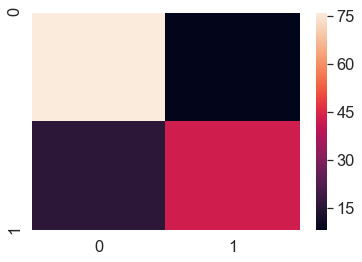

In [111]:
# MAke our confusion matrix more visual with seaborn heatmap
import seaborn as sns

#set the font scale
sns.set(font_scale=1.5)

#Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

#plot it using seaborn
sns.heatmap(conf_mat);

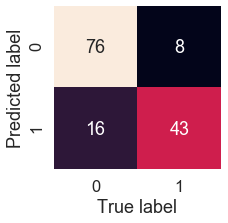

In [112]:
def plot_conf_mat(conf_mat):
    """"
    Plots a confusion matrix using Seaborn heatmap().
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                     annot=True, #Annotate the boxes with conf_mat info
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label");
    
    #Fix the broken annotation (this happende in matplotlib 3.1)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top-0.5)
    
plot_conf_mat(conf_mat)

In [113]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        84
           1       0.84      0.73      0.78        59

    accuracy                           0.83       143
   macro avg       0.83      0.82      0.82       143
weighted avg       0.83      0.83      0.83       143



In [124]:
#Get feature importance
forest = model[4]
importances = pd.DataFrame({'feature': titanic.iloc[:, 1:8].columns, 'importance': np.round(forest.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending = False).set_index('feature')
importances

,importance
feature,
Fare,0.450
Age,0.169
Sex,0.103
Pclass,0.093
SibSp,0.069
Parch,0.069
Embarked,0.046


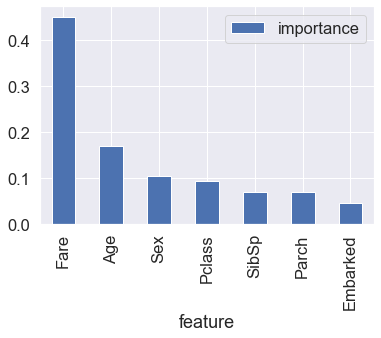

In [125]:
importances.plot.bar()

### Know if i would have survived if i was on the Ship

In [126]:


my_survival = [[2, 1, 22, 0, 0, 23, 2 ]]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
my_survival_scaled = sc.fit_transform(my_survival)

# Print prediction of my survival using Random Forest Classiifier

pred = model[4].predict(my_survival_scaled)
print(pred)

if pred == 0:
    print('Oh no! You did not make it')
else:
    print('Nice! You Survived')

[0]
Oh no! You did not make it
